# Clustering

# Clustering 2D points

In [ ]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


# Inspect your clustering

In [ ]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


# How many clusters

### Here we are going to plot an inertia plot.
### Inertia- Distance of the points from the centroid of the cluster. (lower the value, better the cluster)
### We look for the 'elbow' in the inertia graph to better recognize clusters.
### When the rate of decrease becomes very low (sudden change in the line plot of inertia)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [12]:
samples= np.array([[ 242. ,   23.2,   25.4,   30. ,   38.4,   13.4],
       [ 290. ,   24. ,   26.3,   31.2,   40. ,   13.8],
       [ 340. ,   23.9,   26.5,   31.1,   39.8,   15.1],
       [ 363. ,   26.3,   29. ,   33.5,   38. ,   13.3],
       [ 430. ,   26.5,   29. ,   34. ,   36.6,   15.1],
       [ 450. ,   26.8,   29.7,   34.7,   39.2,   14.2],
       [ 500. ,   26.8,   29.7,   34.5,   41.1,   15.3],
       [ 390. ,   27.6,   30. ,   35. ,   36.2,   13.4],
       [ 450. ,   27.6,   30. ,   35.1,   39.9,   13.8],
       [ 500. ,   28.5,   30.7,   36.2,   39.3,   13.7],
       [ 475. ,   28.4,   31. ,   36.2,   39.4,   14.1],
       [ 500. ,   28.7,   31. ,   36.2,   39.7,   13.3],
       [ 500. ,   29.1,   31.5,   36.4,   37.8,   12. ],
       [ 600. ,   29.4,   32. ,   37.2,   40.2,   13.9],
       [ 600. ,   29.4,   32. ,   37.2,   41.5,   15. ],
       [ 700. ,   30.4,   33. ,   38.3,   38.8,   13.8],
       [ 700. ,   30.4,   33. ,   38.5,   38.8,   13.5],
       [ 610. ,   30.9,   33.5,   38.6,   40.5,   13.3],
       [ 650. ,   31. ,   33.5,   38.7,   37.4,   14.8],
       [ 575. ,   31.3,   34. ,   39.5,   38.3,   14.1],
       [ 685. ,   31.4,   34. ,   39.2,   40.8,   13.7],
       [ 620. ,   31.5,   34.5,   39.7,   39.1,   13.3],
       [ 680. ,   31.8,   35. ,   40.6,   38.1,   15.1],
       [ 700. ,   31.9,   35. ,   40.5,   40.1,   13.8],
       [ 725. ,   31.8,   35. ,   40.9,   40. ,   14.8],
       [ 720. ,   32. ,   35. ,   40.6,   40.3,   15. ],
       [ 714. ,   32.7,   36. ,   41.5,   39.8,   14.1],
       [ 850. ,   32.8,   36. ,   41.6,   40.6,   14.9],
       [1000. ,   33.5,   37. ,   42.6,   44.5,   15.5],
       [ 920. ,   35. ,   38.5,   44.1,   40.9,   14.3],
       [ 955. ,   35. ,   38.5,   44. ,   41.1,   14.3],
       [ 925. ,   36.2,   39.5,   45.3,   41.4,   14.9],
       [ 975. ,   37.4,   41. ,   45.9,   40.6,   14.7],
       [ 950. ,   38. ,   41. ,   46.5,   37.9,   13.7],
       [  40. ,   12.9,   14.1,   16.2,   25.6,   14. ],
       [  69. ,   16.5,   18.2,   20.3,   26.1,   13.9],
       [  78. ,   17.5,   18.8,   21.2,   26.3,   13.7],
       [  87. ,   18.2,   19.8,   22.2,   25.3,   14.3],
       [ 120. ,   18.6,   20. ,   22.2,   28. ,   16.1],
       [   0. ,   19. ,   20.5,   22.8,   28.4,   14.7],
       [ 110. ,   19.1,   20.8,   23.1,   26.7,   14.7],
       [ 120. ,   19.4,   21. ,   23.7,   25.8,   13.9],
       [ 150. ,   20.4,   22. ,   24.7,   23.5,   15.2],
       [ 145. ,   20.5,   22. ,   24.3,   27.3,   14.6],
       [ 160. ,   20.5,   22.5,   25.3,   27.8,   15.1],
       [ 140. ,   21. ,   22.5,   25. ,   26.2,   13.3],
       [ 160. ,   21.1,   22.5,   25. ,   25.6,   15.2],
       [ 169. ,   22. ,   24. ,   27.2,   27.7,   14.1],
       [ 161. ,   22. ,   23.4,   26.7,   25.9,   13.6],
       [ 200. ,   22.1,   23.5,   26.8,   27.6,   15.4],
       [ 180. ,   23.6,   25.2,   27.9,   25.4,   14. ],
       [ 290. ,   24. ,   26. ,   29.2,   30.4,   15.4],
       [ 272. ,   25. ,   27. ,   30.6,   28. ,   15.6],
       [ 390. ,   29.5,   31.7,   35. ,   27.1,   15.3],
       [   6.7,    9.3,    9.8,   10.8,   16.1,    9.7],
       [   7.5,   10. ,   10.5,   11.6,   17. ,   10. ],
       [   7. ,   10.1,   10.6,   11.6,   14.9,    9.9],
       [   9.7,   10.4,   11. ,   12. ,   18.3,   11.5],
       [   9.8,   10.7,   11.2,   12.4,   16.8,   10.3],
       [   8.7,   10.8,   11.3,   12.6,   15.7,   10.2],
       [  10. ,   11.3,   11.8,   13.1,   16.9,    9.8],
       [   9.9,   11.3,   11.8,   13.1,   16.9,    8.9],
       [   9.8,   11.4,   12. ,   13.2,   16.7,    8.7],
       [  12.2,   11.5,   12.2,   13.4,   15.6,   10.4],
       [  13.4,   11.7,   12.4,   13.5,   18. ,    9.4],
       [  12.2,   12.1,   13. ,   13.8,   16.5,    9.1],
       [  19.7,   13.2,   14.3,   15.2,   18.9,   13.6],
       [  19.9,   13.8,   15. ,   16.2,   18.1,   11.6],
       [ 200. ,   30. ,   32.3,   34.8,   16. ,    9.7],
       [ 300. ,   31.7,   34. ,   37.8,   15.1,   11. ],
       [ 300. ,   32.7,   35. ,   38.8,   15.3,   11.3],
       [ 300. ,   34.8,   37.3,   39.8,   15.8,   10.1],
       [ 430. ,   35.5,   38. ,   40.5,   18. ,   11.3],
       [ 345. ,   36. ,   38.5,   41. ,   15.6,    9.7],
       [ 456. ,   40. ,   42.5,   45.5,   16. ,    9.5],
       [ 510. ,   40. ,   42.5,   45.5,   15. ,    9.8],
       [ 540. ,   40.1,   43. ,   45.8,   17. ,   11.2],
       [ 500. ,   42. ,   45. ,   48. ,   14.5,   10.2],
       [ 567. ,   43.2,   46. ,   48.7,   16. ,   10. ],
       [ 770. ,   44.8,   48. ,   51.2,   15. ,   10.5],
       [ 950. ,   48.3,   51.7,   55.1,   16.2,   11.2],
       [1250. ,   52. ,   56. ,   59.7,   17.9,   11.7],
       [1600. ,   56. ,   60. ,   64. ,   15. ,    9.6],
       [1550. ,   56. ,   60. ,   64. ,   15. ,    9.6],
       [1650. ,   59. ,   63.4,   68. ,   15.9,   11. ]])

In [21]:
species= np.array(['Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike'])

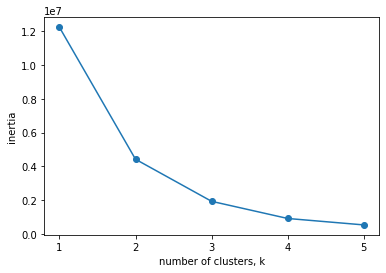

In [22]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model= KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o') 
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# 3 clusters look optimal

# Evaluating the clustering

In [ ]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)  # same as using .fit() followed by .predict()

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

# Scaling data for clustering

In [31]:
# Perform the necessary imports
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [32]:
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)


# Clustering the fish data

In [33]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            0     0      0     13
2            1     0     19      1
3            0    17      0      0


# Clustering stocks using KMeans

### Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.
### Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

In [ ]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


# Which stocks move together?

In [ ]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(by='labels'))


# Hierarchical clustering of the grain data

In [43]:
samples=np.array([[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5.15  ],
       [16.84  , 15.67  ,  0.8623,  5.998 ,  3.484 ,  4.675 ,  5.877 ],
       [17.32  , 15.91  ,  0.8599,  6.064 ,  3.403 ,  3.824 ,  5.922 ],
       [18.72  , 16.19  ,  0.8977,  6.006 ,  3.857 ,  5.324 ,  5.879 ],
       [18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ],
       [18.76  , 16.2   ,  0.8984,  6.172 ,  3.796 ,  3.12  ,  6.053 ],
       [19.31  , 16.59  ,  0.8815,  6.341 ,  3.81  ,  3.477 ,  6.238 ],
       [17.99  , 15.86  ,  0.8992,  5.89  ,  3.694 ,  2.068 ,  5.837 ],
       [18.85  , 16.17  ,  0.9056,  6.152 ,  3.806 ,  2.843 ,  6.2   ],
       [19.38  , 16.72  ,  0.8716,  6.303 ,  3.791 ,  3.678 ,  5.965 ],
       [18.96  , 16.2   ,  0.9077,  6.051 ,  3.897 ,  4.334 ,  5.75  ],
       [18.14  , 16.12  ,  0.8772,  6.059 ,  3.563 ,  3.619 ,  6.011 ],
       [18.65  , 16.41  ,  0.8698,  6.285 ,  3.594 ,  4.391 ,  6.102 ],
       [18.94  , 16.32  ,  0.8942,  6.144 ,  3.825 ,  2.908 ,  5.949 ],
       [17.36  , 15.76  ,  0.8785,  6.145 ,  3.574 ,  3.526 ,  5.971 ],
       [13.32  , 13.94  ,  0.8613,  5.541 ,  3.073 ,  7.035 ,  5.44  ],
       [11.43  , 13.13  ,  0.8335,  5.176 ,  2.719 ,  2.221 ,  5.132 ],
       [12.01  , 13.52  ,  0.8249,  5.405 ,  2.776 ,  6.992 ,  5.27  ],
       [11.34  , 12.87  ,  0.8596,  5.053 ,  2.849 ,  3.347 ,  5.003 ],
       [12.02  , 13.33  ,  0.8503,  5.35  ,  2.81  ,  4.271 ,  5.308 ],
       [12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ],
       [11.55  , 13.1   ,  0.8455,  5.167 ,  2.845 ,  6.715 ,  4.956 ],
       [11.26  , 13.01  ,  0.8355,  5.186 ,  2.71  ,  5.335 ,  5.092 ],
       [12.46  , 13.41  ,  0.8706,  5.236 ,  3.017 ,  4.987 ,  5.147 ],
       [11.81  , 13.45  ,  0.8198,  5.413 ,  2.716 ,  4.898 ,  5.352 ],
       [11.27  , 12.86  ,  0.8563,  5.091 ,  2.804 ,  3.985 ,  5.001 ],
       [12.79  , 13.53  ,  0.8786,  5.224 ,  3.054 ,  5.483 ,  4.958 ],
       [12.67  , 13.32  ,  0.8977,  4.984 ,  3.135 ,  2.3   ,  4.745 ],
       [11.23  , 12.88  ,  0.8511,  5.14  ,  2.795 ,  4.325 ,  5.003 ]])

In [44]:
varieties= ['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

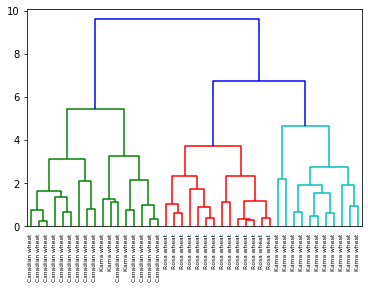

In [45]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

# Hierarchies of stocks

### SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

In [ ]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6 )
plt.show()

#### You learned that the linkage method defines how the distance between clusters is measured. In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. In single linkage, the distance between clusters is the distance between the closest points of the clusters.

# Single linkage hierarchical clustering

In [ ]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6 )
plt.show()


# Extracting the cluster labels for a particular height of dendrogram/ distance of clustering

### use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

In [ ]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

# t-SNE visualization of grain dataset

### TSNE helps to visualize higher dimension datasets in 2D or 3D form

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()


# A t-SNE map of the stock market

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()